In [1]:
import pandas as pd
from nsepy import get_history
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol = 'AXISBANK.NS'

In [3]:
start

datetime.datetime(2021, 6, 1, 0, 0)

In [4]:
end

datetime.datetime(2022, 1, 5, 0, 0)

In [5]:
symbol

'AXISBANK.NS'

In [6]:
# Download stock data
stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[['Open', 'High', 'Low', 'Close']]
stk_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024
2021-06-02,744.799988,745.299988,734.200012,737.000000
2021-06-03,743.000000,752.250000,739.000000,750.650024
2021-06-04,751.000000,759.900024,740.099976,742.049988
2021-06-07,743.099976,753.950012,741.500000,751.099976
...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000
2021-12-30,668.000000,673.099976,664.500000,668.849976
2021-12-31,672.950012,686.500000,671.200012,678.549988


In [7]:
# Normalize the 'Close' column
column = 'Close'
ms = MinMaxScaler()
data1 = pd.DataFrame(ms.fit_transform(stk_data[[column]]), columns=[column])


In [8]:
data1

,Close
0,0.484794
1,0.442784
2,0.513145
3,0.468814
4,0.515464
...,...
145,0.100000
146,0.091495
147,0.141495
148,0.233247


In [10]:

# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,df,pollutant):
    plt.figure(figsize=(16,5))
    # Plot the data
    # ADF Test
    # Function to print out results in customised manner
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[pollutant], label = pollutant)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,pollutant))
    plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()
    
    return message
    
# Call the function and run the test



Results of Dickey-Fuller Test:
Test Statistic                  -1.370200
p-value                          0.596476
#Lags Used                       3.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Staionarity 


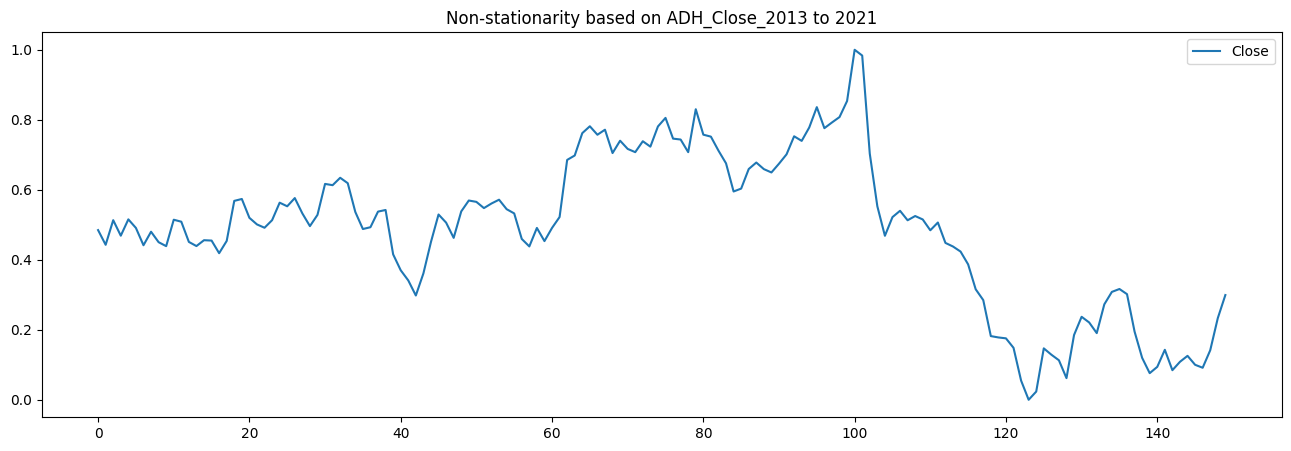

'Non-stationarity based on ADH'

In [11]:
adf_test(data1["Close"],data1,"Close")

Results of Dickey-Fuller Test:
Test Statistic                  -1.370200
p-value                          0.596476
#Lags Used                       3.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64
Data is non-stationary (Fail to reject null hypothesis).


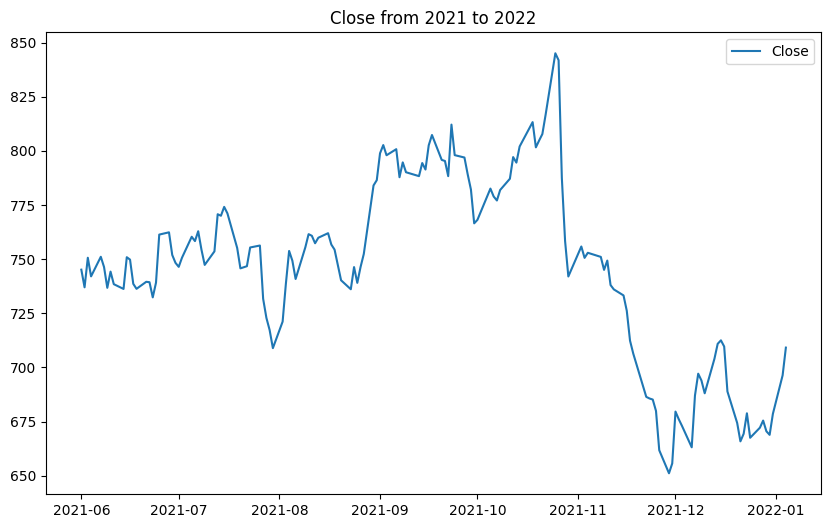

Initial p-value: 0.5964762909376662


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Define the ADF test function
def adf_test(timeseries, df, column_name):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    # Print the stationarity condition
    if dfoutput['p-value'] <= 0.05:
        print("Data is stationary (Reject null hypothesis).")
    else:
        print("Data is non-stationary (Fail to reject null hypothesis).")
        
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column_name], label=column_name)
    plt.legend(loc='best')
    plt.title(f"{column_name} from 2021 to 2022")
    plt.show()
    
    return dfoutput['p-value']

# Initial ADF test on original data
p_value = adf_test(stk_data['Close'], stk_data, 'Close')
print("Initial p-value:", p_value)


C:\Users\saran\AppData\Local\Temp\ipykernel_32652\442279793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stk_data['Close_diff'] = stk_data['Close'].diff().dropna()



Applying first-order differencing...
Results of Dickey-Fuller Test:
Test Statistic                -7.896099e+00
p-value                        4.306897e-12
#Lags Used                     2.000000e+00
Number of Observations Used    1.460000e+02
Critical Value (1%)           -3.475953e+00
Critical Value (5%)           -2.881548e+00
Critical Value (10%)          -2.577439e+00
dtype: float64
Data is stationary (Reject null hypothesis).


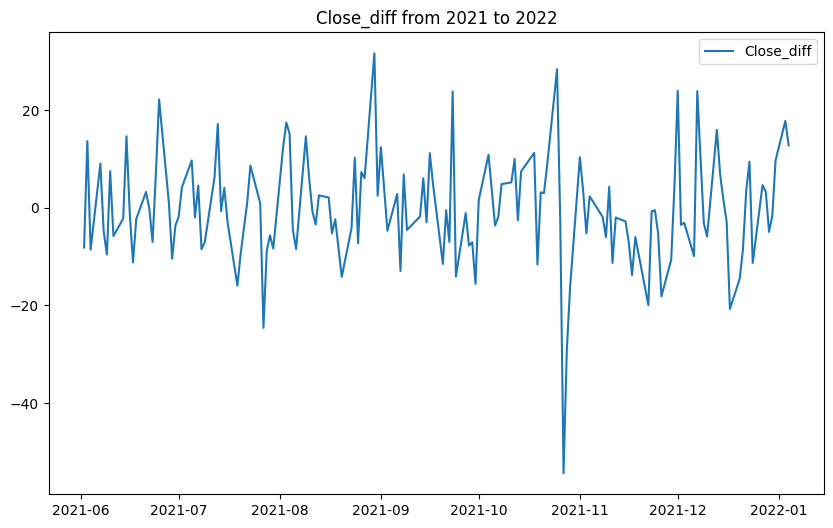

Differenced data p-value: 4.3068969357925926e-12


In [16]:
# Apply differencing if data is non-stationary
if p_value > 0.05:
    stk_data['Close_diff'] = stk_data['Close'].diff().dropna()
    print("\nApplying first-order differencing...")

    # Run the ADF test on differenced data
    p_value_diff = adf_test(stk_data['Close_diff'].dropna(), stk_data.dropna(), 'Close_diff')
    print("Differenced data p-value:", p_value_diff)
